---
# Hole-response curves

In [1]:
from linescanning import (
    prf, 
    utils,
    pycortex,
    plotting)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nb
import os
opj = os.path.join

In [2]:
subject = "sub-005"
ses = "ses-1"
v1_data = True
model = "norm"
verbose = True
bv = False
stage = "iter"
v_target = 0

deriv_dir = "/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives"
prf_dir = f"{deriv_dir}/prf/{subject}/{ses}"
cx_dir = f"{deriv_dir}/pycortex/{subject}"
hemi = "L"
hemi_tag = "lh"

In [3]:
# load in subject
SI_ = prf.CollectSubject(
    subject, 
    prf_dir=prf_dir, 
    cx_dir=cx_dir, 
    hemi=hemi, 
    resize_pix=270,
    best_vertex=bv,
    verbose=verbose,
    model=model,
    v1=v1_data)

Reading full-cortex pRF estimates with ['stage-iter', 'params.pkl', '_roi-V1']
 model: gauss:	/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_roi-V1_model-gauss_stage-iter_desc-prf_params.pkl
 model: norm:	/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_roi-V1_model-norm_stage-iter_desc-prf_params.pkl
Reading /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/pycortex/sub-005/sub-005_model-norm_desc-best_vertices.csv
Target vertex: 6055
Shape final parameters: (617224, 10) [full cortex]
Design has 4 more volumes than timecourses, trimming from beginning of design to (100, 100, 221)
Reading settings from '/data1/projects/MicroFunc/Jurjen/programs/packages/linescanning/misc/prf_analysis.yml'
Instantiate HRF with: [1, 1, 0] (fit=False)
Using constraint(s): ['tc', 'tc']
Inserting parameters from <class 'numpy.ndarray'> as 'norm_iter' in <linescanning.prf.CollectSubject object

In [4]:
# if v1_data:
#     if not hasattr(SI_, "target_vertex"):
#         raise ValueError(f"Something doesn't add up.. You requested the normalization parameters from the V1-fit, but I cannot find the index of the target vertex. Did CollectSubject do what it was supposed to..?")
#     v_target = SI_.target_vertex

#     # # add the shape of left hemisphere data to target in right hemisphere
#     if hemi == "rh":
#         surf = opj(deriv_dir, "freesurfer", subject, 'surf', 'lh.white')
#         n_vert = nb.freesurfer.io.read_geometry(surf)[0].shape[0]

#         # we got rh.white vertex ID, correct for whole-brain vertex IDs
#         if v_target < n_vert:
#             print(f"Received original rh.fiducial vertex ({v_target}), correcting to whole-brain vertex IDs ({v_target+n_vert})")
#             v_target += n_vert
#         else:
#             print(f"Received whole-brain vertex for 'rh' ({v_target})")

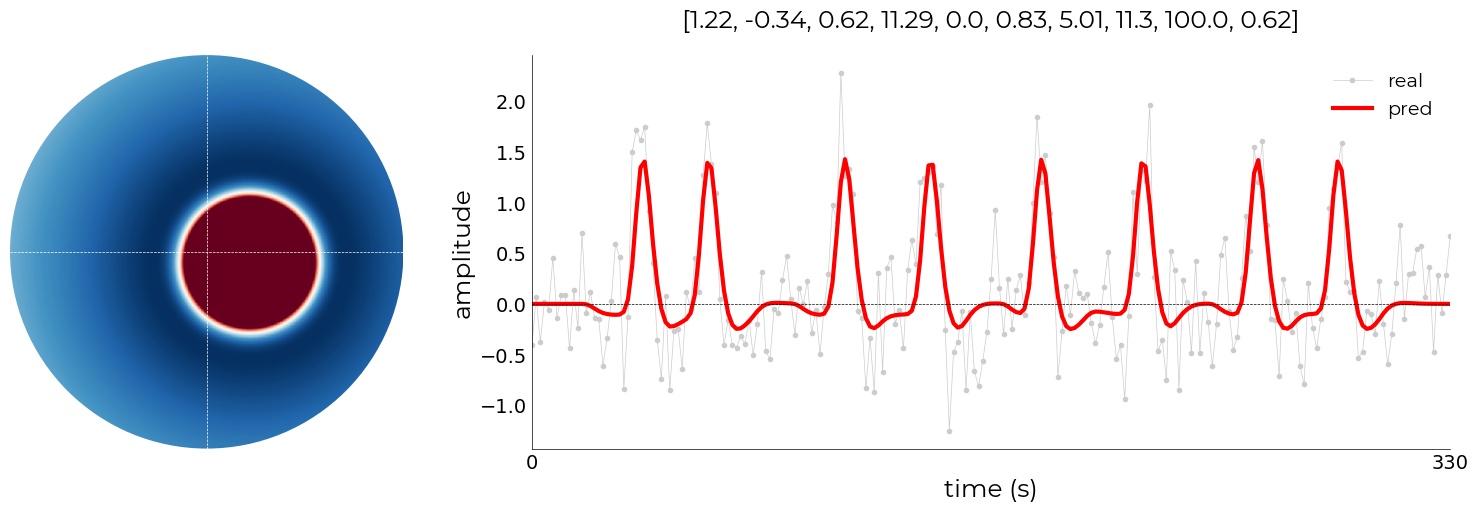

In [5]:
%matplotlib inline
# get the prf, timecourse, and prediction
pars,prf_old,tc_bold,pred_old = SI_.plot_vox(
    vox_nr=v_target,
    model=model,
    stage="iter",
    title="pars",
    edge_color=None,
    make_figure=True)

In [7]:
# copy
pars_new = pars.copy()
prf_new = prf_old.copy()
tc_new = pred_old.copy()

if verbose:
    print(f"Copying original parameters: {[round(ii, 2) for ii in pars]}")

# pars_new[5] = 1
# pars_new[6] = 5
pars_new

Copying original parameters: [1.22, -0.34, 0.62, 11.29, 0.0, 0.83, 5.01, 11.3, 100.0, 0.62]


array([ 1.22486375, -0.34467812,  0.62284632, 11.28644725,  0.        ,
        0.83452379,  5.0073411 , 11.30093572, 99.99933893,  0.6181332 ])

In [8]:
# size response functions
SR_ = prf.SizeResponse(params=pars_new, subject_info=SI_)

In [9]:
if verbose:
    print("Making response-curves for 'full', 'fill', 'hole' stimuli")

# activation
SR_.make_stimuli(factor=1, dt="fill")

# suppression
SR_.make_stimuli(factor=1, dt="hole")

Making response-curves for 'full', 'fill', 'hole' stimuli


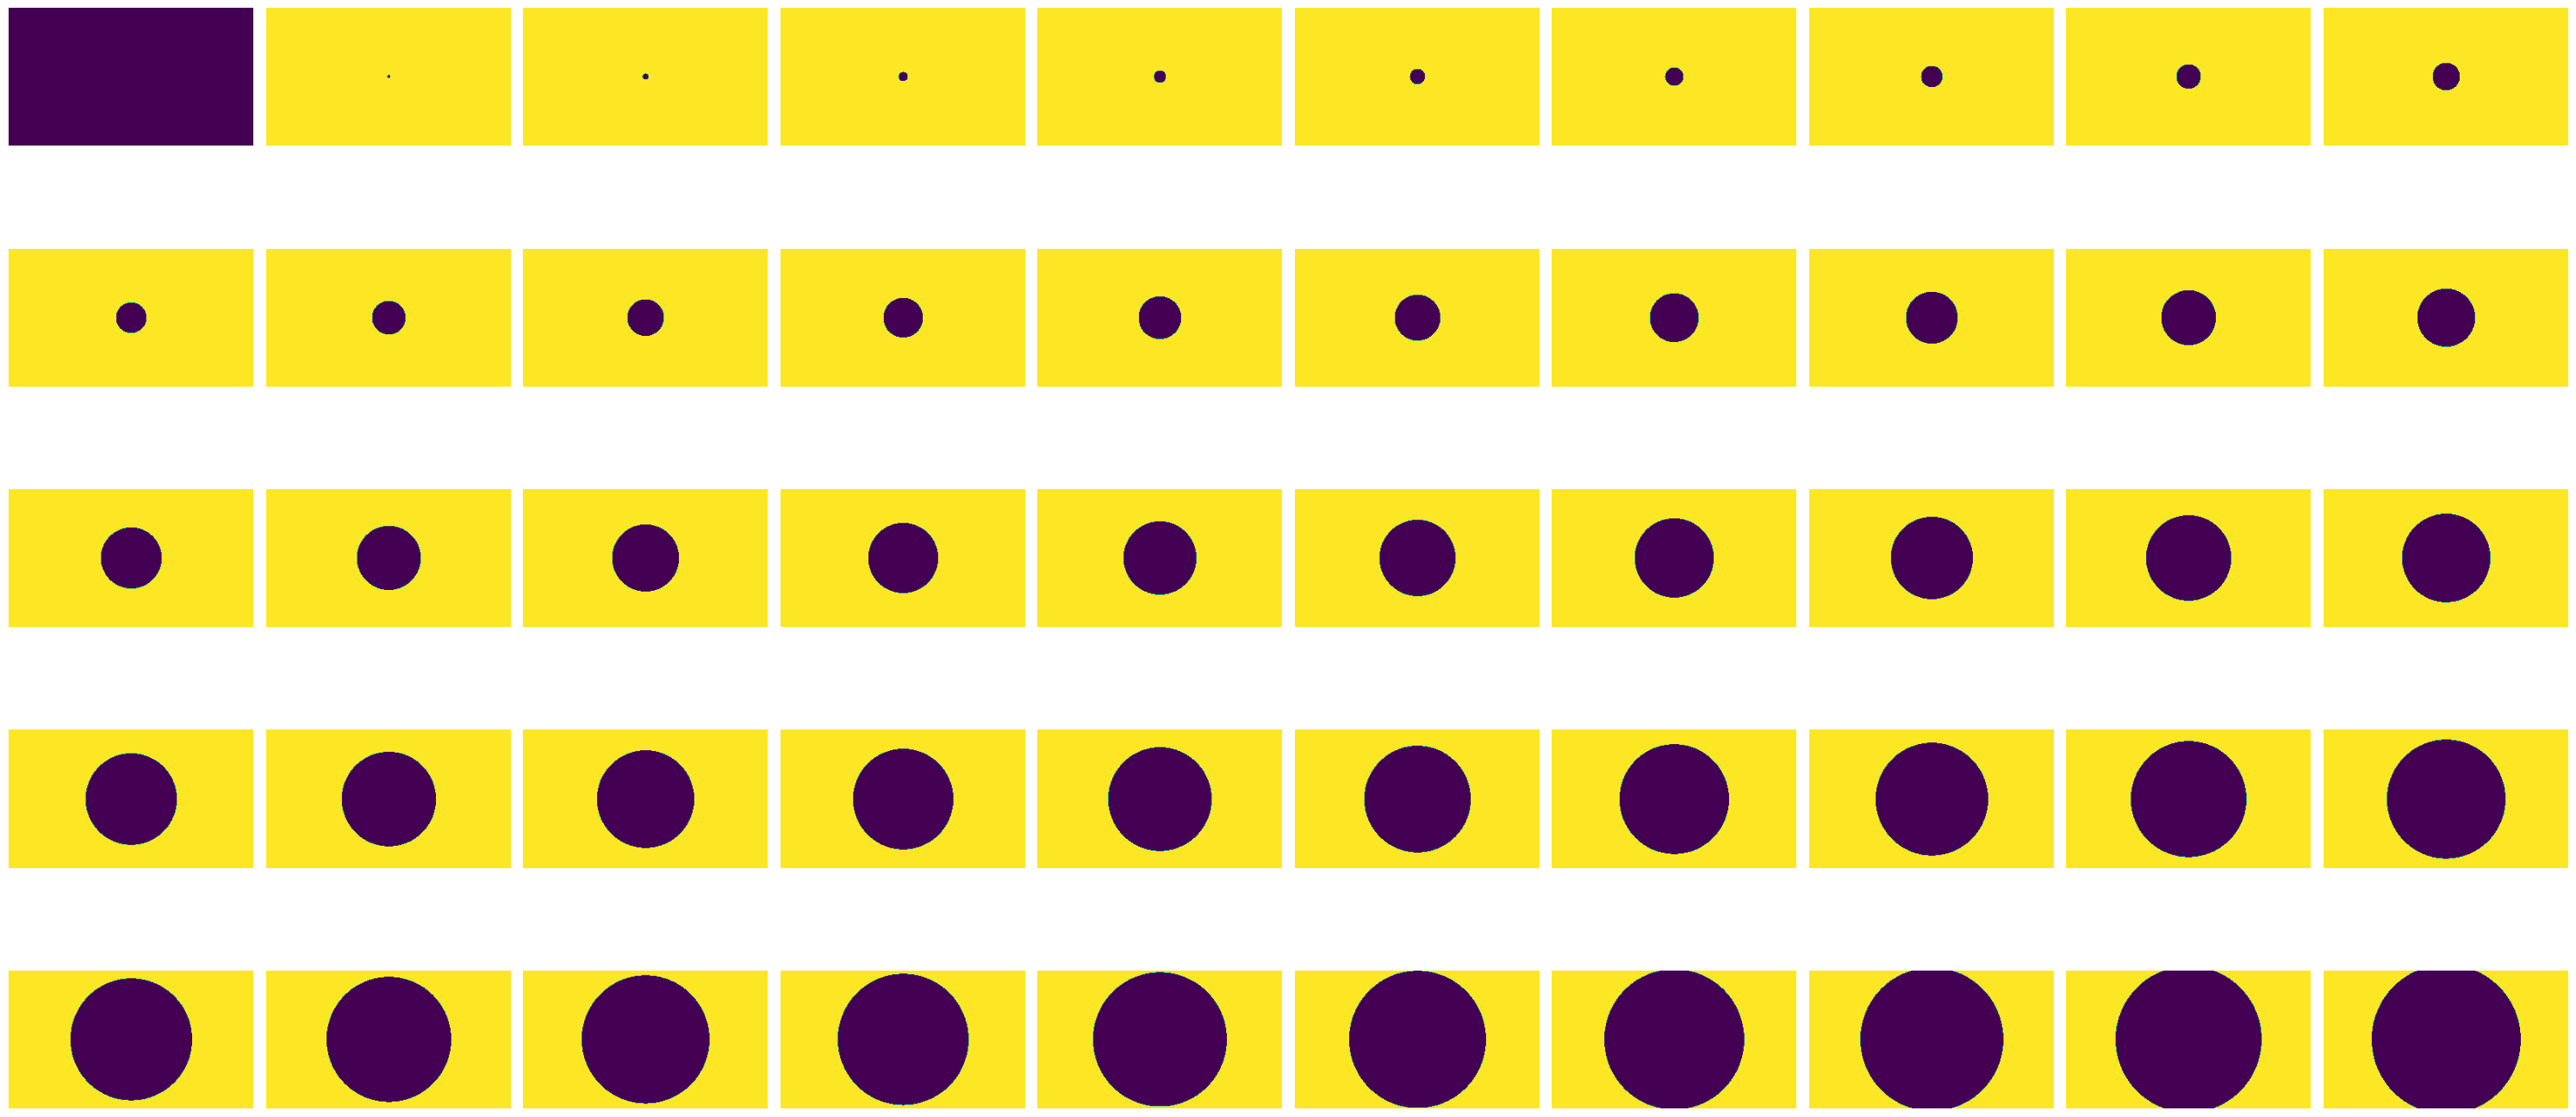

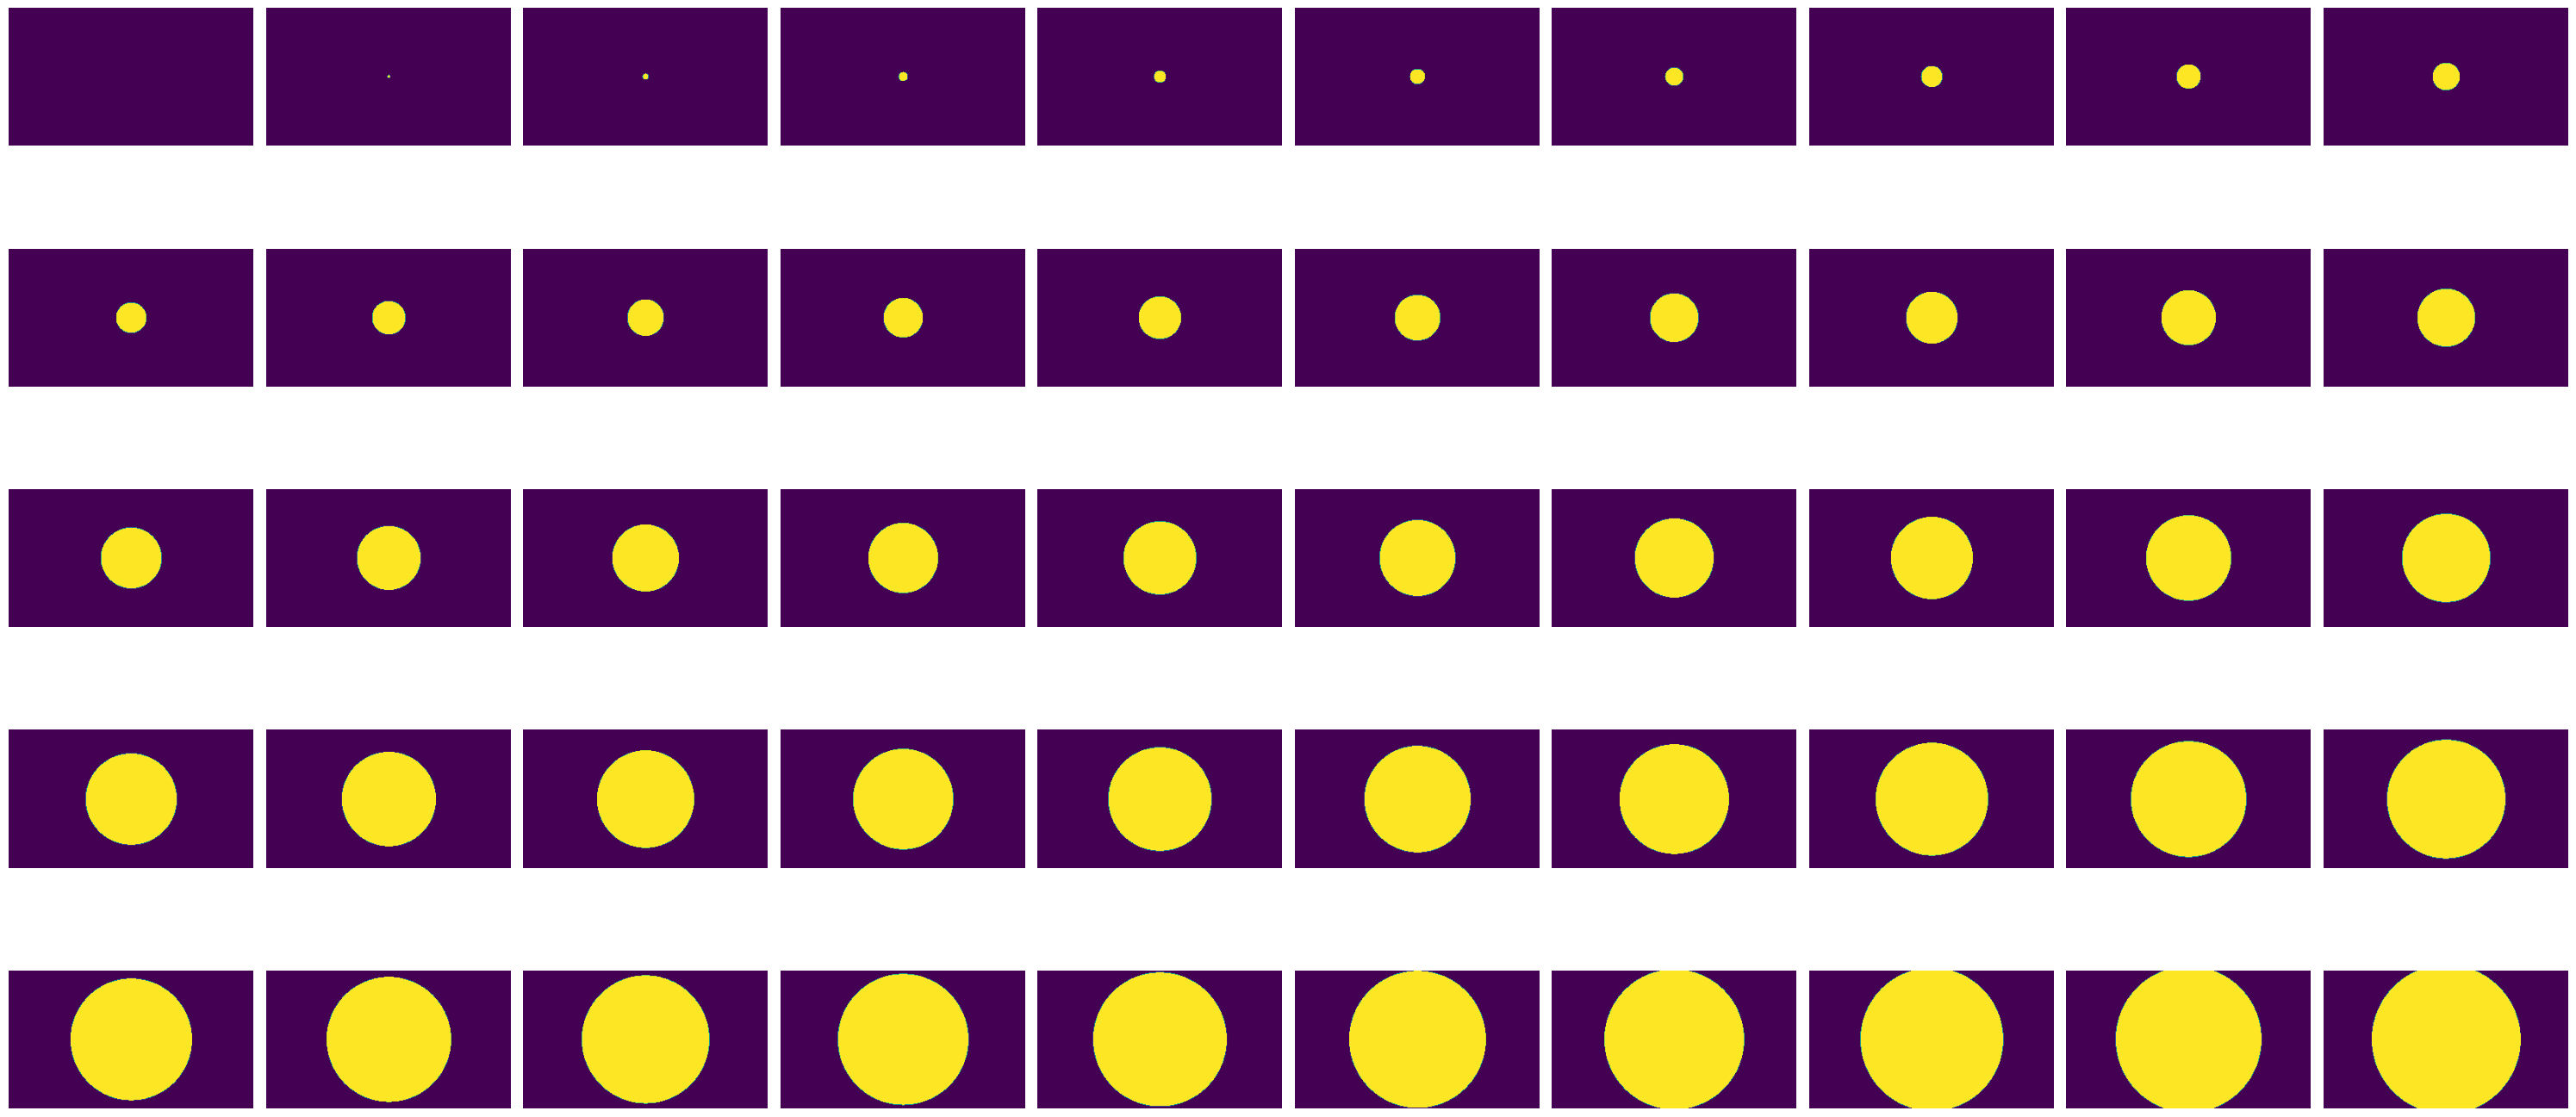

In [11]:
%matplotlib inline
prf.plot_stims(SR_.stims_hole, extent=SR_.vf_extent, interval=2)
prf.plot_stims(SR_.stims_fill, extent=SR_.vf_extent, interval=2)

In [15]:
pars = SR_.params_df
pars = SI_.norm_iter_pars_df #[SI_.norm_iter_pars_df.r2>0.82]
pars

,x,y,prf_size,prf_ampl,bold_bsl,surr_ampl,surr_size,neur_bsl,surr_bsl,A,B,C,D,ratio (B/D),r2,size ratio,suppression index,ecc,polar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
617220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
617221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
617222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0


In [14]:
sr_file = opj(SI_.prf_dir, f"{subject}_ses-1_task-2R_roi-V1_model-norm_stage-iter_desc-srf.pkl")
if not os.path.exists(sr_file):

    utils.verbose(f"Generating SRFs; can take 30+ minutes..", True)
    
    # create SRFs for activation & normalization parameters
    sr_fill = SR_.batch_sr_function(
        pars,
        stims=SR_.stims_fill,
        batch_size=500,
        parallel=False
    )

    sr_hole = SR_.batch_sr_function(
        pars,
        stims=SR_.stims_hole,
        batch_size=500,
        parallel=False
    )  

    # parse into dataframe
    sr_ = []
    for tag,sizes,srf in zip(
        ["act","norm"],
        [SR_.stims_fill_sizes,SR_.stims_hole_sizes],
        [sr_fill,sr_hole]
        ):

        df = pd.DataFrame(srf.T)
        df["subject"],df["type"],df["size"],df["stim_nr"] = subject,tag,sizes,np.arange(0,len(sizes), dtype=int)

        sr_.append(df)

    sr_ = pd.concat(sr_)

    # get ratio
    act_max = sr_fill.max(axis=-1)
    norm_max = np.abs(sr_hole).max(axis=-1)

    sr_ratio = act_max/norm_max
    sr_ratio /= np.nanmax(sr_ratio)

    ratio_df = pd.DataFrame(sr_ratio).T
    ratio_df["subject"],ratio_df["type"],ratio_df["size"],ratio_df["stim_nr"] = subject,"ratio",999,999

    df_sr = pd.concat([sr_,ratio_df])
    df_sr = df_sr.set_index(["subject","type","size","stim_nr"])
    
    # save
    df_sr.to_pickle(sr_file)
else:
    utils.verbose(f"Reading '{sr_file}'", True)
    df_sr = pd.read_pickle(sr_file)

df_sr

Reading '/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_roi-V1_model-norm_stage-iter_desc-srf.pkl'


0       1       2       3       4        
subject type  size       stim_nr                                           
sub-005 act   0.000000   0           0.0     0.0     0.0     0.0     0.0  \
              0.117663   1           0.0     0.0     0.0     0.0     0.0   
              0.235325   2           0.0     0.0     0.0     0.0     0.0   
              0.352988   3           0.0     0.0     0.0     0.0     0.0   
              0.470651   4           0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
        norm  18.355377  156         0.0     0.0     0.0     0.0     0.0   
              18.473039  157         0.0     0.0     0.0     0.0     0.0   
              18.590702  158         0.0     0.0     0.0     0.0     0.0   
              18.708365  159         0.0     0.0     0.0     0.0     0.0   
        ratio 999.000000 999         NaN     NaN     NaN     NaN     NaN   

                                  5       6       7       8       9       ...   
subject type  size       stim_nr                                          ...   
sub-005 act   0.000000   0           0.0     0.0     0.0     0.0     0.0  ...  \
              0.117663   1           0.0     0.0     0.0     0.0     0.0  ...   
              0.235325   2           0.0     0.0     0.0     0.0     0.0  ...   
              0.352988   3           0.0     0.0     0.0     0.0     0.0  ...   
              0.470651   4           0.0     0.0     0.0     0.0     0.0  ...   
...                                  ...     ...     ...     ...     ...  ...   
        norm  18.355377  156         0.0     0.0     0.0     0.0     0.0  ...   
              18.473039  157         0.0     0.0     0.0     0.0     0.0  ...   
              18.590702  158         0.0     0.0     0.0     0.0     0.0  ...   
              18.708365  159         0.0     0.0     0.0     0.0     0.0  ...   
        ratio 999.000000 999         NaN     NaN     NaN     NaN     NaN  ...   

                                  617214  617215  617216  617217  617218   
subject type  size       stim_nr                                           
sub-005 act   0.000000   0           0.0     0.0     0.0     0.0     0.0  \
              0.117663   1           0.0     0.0     0.0     0.0     0.0   
              0.235325   2           0.0     0.0     0.0     0.0     0.0   
              0.352988   3           0.0     0.0     0.0     0.0     0.0   
              0.470651   4           0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
        norm  18.355377  156         0.0     0.0     0.0     0.0     0.0   
              18.473039  157         0.0     0.0     0.0     0.0     0.0   
              18.590702  158         0.0     0.0     0.0     0.0     0.0   
              18.708365  159         0.0     0.0     0.0     0.0     0.0   
        ratio 999.000000 999         NaN     NaN     NaN     NaN     NaN   

                                  617219  617220  617221  617222  617223  
subject type  size       stim_nr                                          
sub-005 act   0.000000   0           0.0     0.0     0.0     0.0     0.0  
              0.117663   1           0.0     0.0     0.0     0.0     0.0  
              0.235325   2           0.0     0.0     0.0     0.0     0.0  
              0.352988   3           0.0     0.0     0.0     0.0     0.0  
              0.470651   4           0.0     0.0     0.0     0.0     0.0  
...                                  ...     ...     ...     ...     ...  
        norm  18.355377  156         0.0     0.0     0.0     0.0     0.0  
              18.473039  157         0.0     0.0     0.0     0.0     0.0  
              18.590702  158         0.0     0.0     0.0     0.0     0.0  
              18.708365  159         0.0     0.0     0.0     0.0     0.0  
        ratio 999.000000 999         NaN     NaN     NaN     NaN     NaN  

[321 rows x 617224 columns

In [16]:
sr_fill = utils.select_from_df(df_sr, expression="type = act").values.T
sr_hole = utils.select_from_df(df_sr, expression="type = norm").values.T
ratios = utils.select_from_df(df_sr, expression="type = ratio").values.T

In [23]:
alpha = np.zeros_like(np.squeeze(ratios))
alpha[np.squeeze(ratios)>0] = 1
ratios_v,_ = pycortex.Vertex2D_fix(
    np.squeeze(ratios),
    alpha,
    vmax1=20,
    subject=subject,
    cmap="magma"
)

pyc = pycortex.SavePycortexViews(
    {"ratio": ratios_v},
    subject,
    unfold=1,
    azimuth=180,
    pivot=0,
    altitude=92,
    radius=260,
    specularity=0,
    size=(2000,1200),
    # fig_dir=opj(uris_repo, "results3", "figure_parts"),
    # base_name="sub-fsaverage"
    )

Started server on port 55542


In [17]:
# ratio_ix = np.where(ratios == search_val)[0][0]
act_max = sr_fill.max(axis=-1)
norm_max = np.abs(sr_hole.min(axis=-1))

ratios = act_max/norm_max
# ratios /= sr_ratio.max()

ratio_ix,ratio = utils.find_nearest(ratios,15)
utils.verbose(f"Ratio = {round(ratio,2)} at index {ratio_ix}", True)

Ratio = 15.01 at index 336797


In [18]:
# get response magnitudes and ratio
val_act = act_max[ratio_ix]; ix_act = np.where(sr_fill[ratio_ix,:] == val_act)[0][0]
val_norm = norm_max[ratio_ix]; ix_norm = np.where(np.abs(sr_hole[ratio_ix,:]) == val_norm)[0][0]

print(f"Act response:\t{round(val_act,2)}")
print(f"Norm response:\t{round(val_norm,2)}")
print(f"Ratio act/norm:\t{round(val_act/val_norm,2)}")

# get stimulus sizes
size_act = utils.select_from_df(df_sr, expression=("type = act","&",f"stim_nr = {ix_act}")).reset_index()["size"][0]
size_suppr = utils.select_from_df(df_sr, expression=("type = norm","&",f"stim_nr = {ix_norm}")).reset_index()["size"][0]

print(f"size act stim:\t{round(size_act,2)}")
print(f"size norm stim:\t{round(size_suppr,2)}")

Act response:	11.9
Norm response:	0.79
Ratio act/norm:	15.01
size act stim:	1.65
size norm stim:	4.82


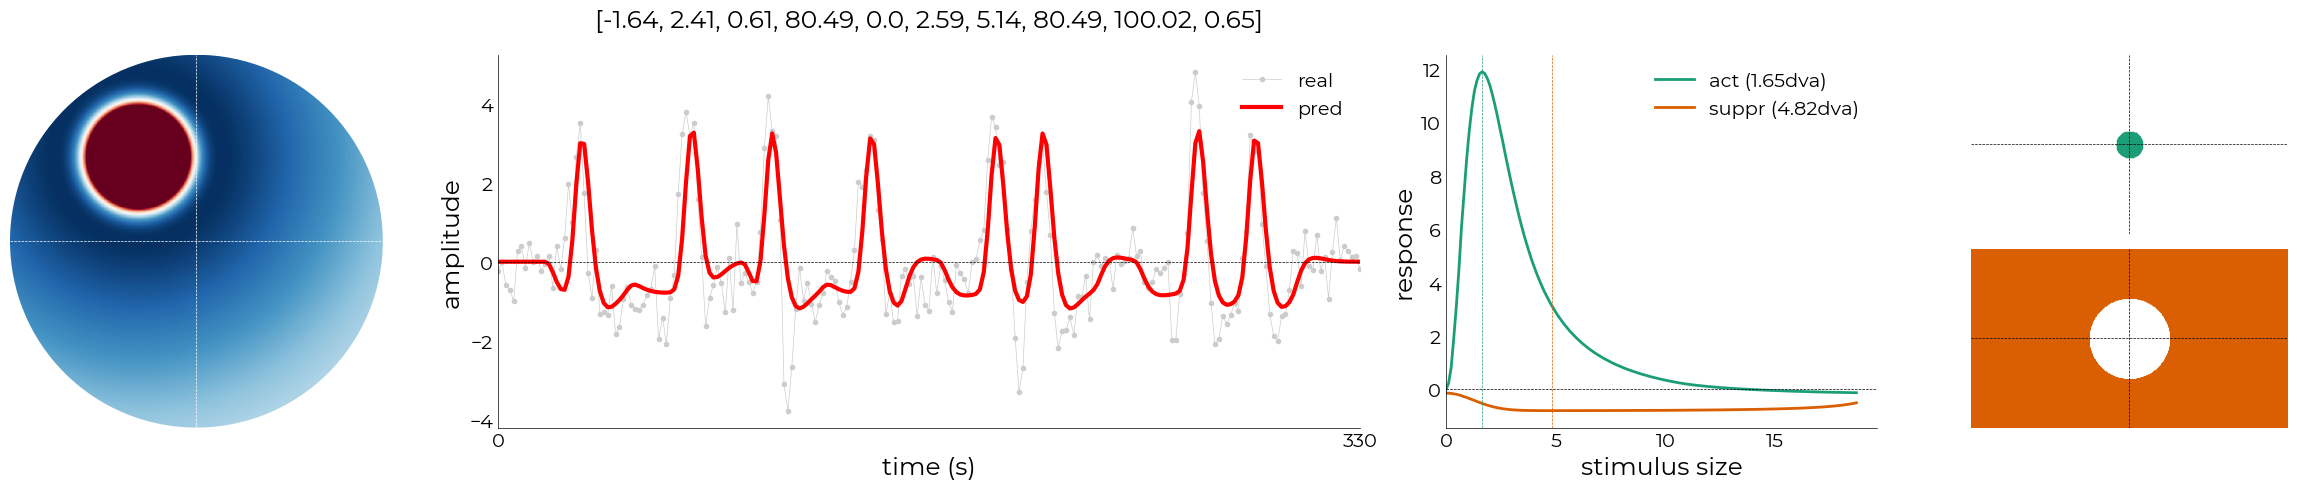

In [76]:
%matplotlib inline

# initialize figure
fig = plt.figure(constrained_layout=True, figsize=(24,5))
subfigs = fig.subfigures(ncols=2, width_ratios=[4,1])
gs00 = subfigs[0].subplots(ncols=3, gridspec_kw={"width_ratios": [10,20,10]})
gs01 = subfigs[1].subplots(nrows=2)
cols = ["#1B9E77","#D95F02"]

pars,prf_old,tc_bold,pred_old = SI_.plot_vox(
    vox_nr=ratio_ix,
    model=model,
    stage="iter",
    title="pars",
    edge_color=None,
    make_figure=True,
    axs=[gs00[0],gs00[1]])

# make plot 
if size_suppr > 5:
    x_lim = [0,size_suppr+(size_suppr*0.1)]
else:
    x_lim = [0,5]

# plot
tc_sizes = [utils.select_from_df(df_sr, expression=f"type = {ii}").iloc[:,ratio_ix] for ii in ["act","norm"]]
plotting.LazyPlot(
    tc_sizes,
    axs=gs00[2],
    xx=SR_.stims_fill_sizes,
    line_width=2, 
    color=["#1B9E77","#D95F02"],
    labels=[f"act ({round(size_act,2)}dva)",f"suppr ({round(size_suppr,2)}dva)"],
    x_label="stimulus size",
    y_label="response",
    add_vline={
        "pos": [size_act,size_suppr],
        "color": ["#1B9E77","#D95F02"]},    
    # x_lim=x_lim,
    add_hline=0)

for ix,ii in enumerate([size_act,size_suppr]):
    SR_.plot_stim_size(
        ii, 
        ax=gs01[ix], 
        dt=["fill","hole"][ix],
        clip=False, 
        cmap=cols[ix],
        vf_extent=SR_.vf_extent)

plt.tight_layout()

In [22]:
prf.Parameters(pars, model="norm").to_df()

,x,y,prf_size,prf_ampl,bold_bsl,surr_ampl,surr_size,neur_bsl,surr_bsl,A,B,C,D,ratio (B/D),r2,size ratio,suppression index,ecc,polar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
617220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
617221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
617222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
